In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scripts import * 

In [2]:
train_data = pd.read_csv('playground-series-s5e3/train.csv')
test_data = pd.read_csv('playground-series-s5e3/test.csv')

In [3]:
len(train_data)

2190

In [4]:
train_data.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
test_data.head(5)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


Em uma analise inicial, podemos ver que nao iremos usar as colunas id e day, entao iremos remove-las

In [6]:
train_data = train_data.drop(columns=['id', 'day'])

# Manteremos o id dos testes para fazer a predicao
test_data = test_data.drop(columns=['day'])

#### Comecaremos a analise exploratoria dos dados de treino

Intepretacao dos atributos

* pressure (Pressão) – Indica a pressão atmosférica medida em uma determinada unidade (geralmente hPa). Pode influenciar padrões climáticos, como frentes frias e tempestades.
* maxtemp (Temperatura Máxima) – Maior temperatura registrada em um período específico, geralmente um dia.
* temperature (Temperatura) – Pode representar a temperatura média registrada em um período específico.
* mintemp (Temperatura Mínima) – Menor temperatura registrada em um período específico.
* dewpoint (Ponto de Orvalho) – Temperatura na qual o ar se torna saturado e o vapor d'água começa a condensar. Relacionado à umidade do ar.
* humidity (Umidade) – Quantidade de vapor d’água presente no ar, geralmente expressa em porcentagem. Umidade alta pode indicar condições para chuva.
* cloud (Nebulosidade) – Quantidade de cobertura de nuvens no céu, geralmente expressa em uma escala percentual.
* sunshine (Insolação) – Quantidade de luz solar direta recebida, medida em horas de sol por dia.
* winddirection (Direção do Vento) – Indica de onde o vento está soprando, geralmente em graus (0° a 360°) ou pontos cardeais (N, NE, etc.).
* windspeed (Velocidade do Vento) – Rapidez do vento, geralmente medida em km/h ou m/s.
* rainfall (Precipitação) – Quantidade de chuva registrada em um período, geralmente em milímetros (mm).

In [7]:
train_data.dtypes

pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

Como todos os dados ja sao numericos, nao e necessarios fazer a conversao

* Dados descritivos dos atributos

In [8]:
train_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


Nao ha faltantes no train data

In [9]:
test_data.isna().sum()

id               0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [10]:
test_data['winddirection'] = test_data['winddirection'].fillna(test_data['winddirection'].median())

In [11]:
train_data.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

Agora iremos plotar os boxplots para analisar a distribuicao dos dados de cada coluna

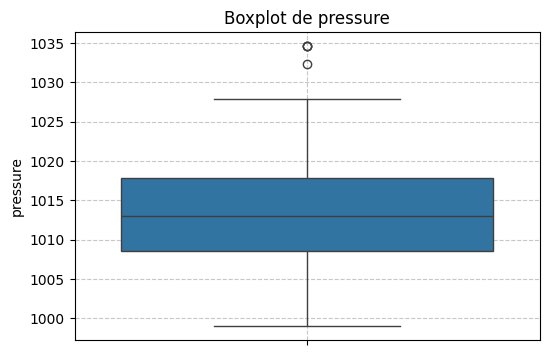

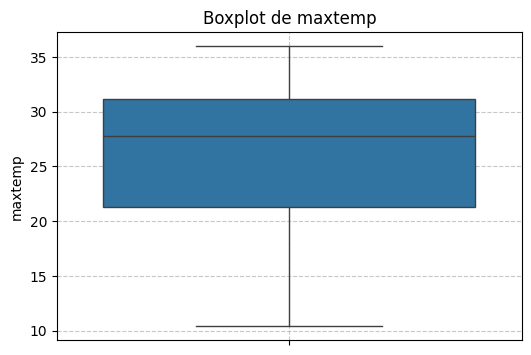

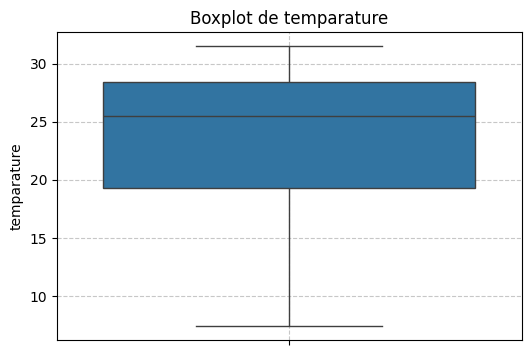

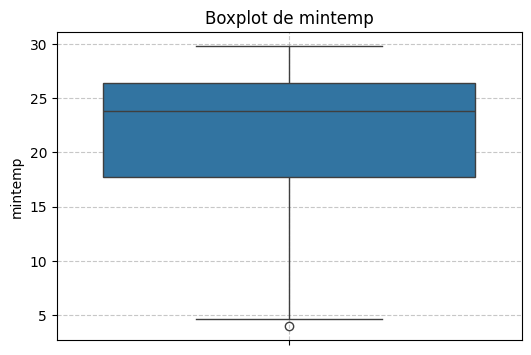

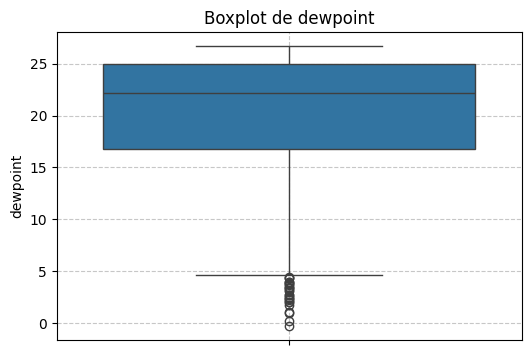

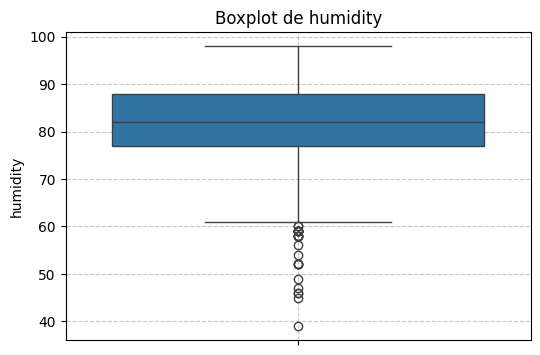

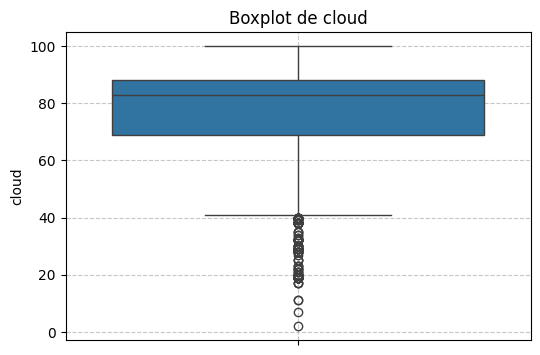

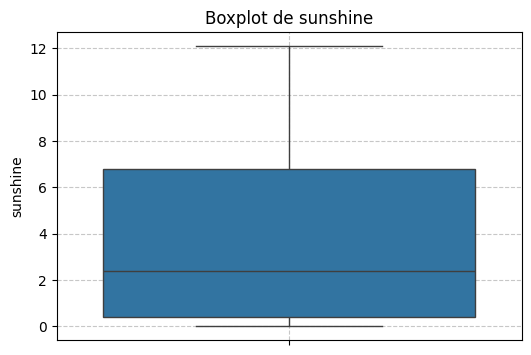

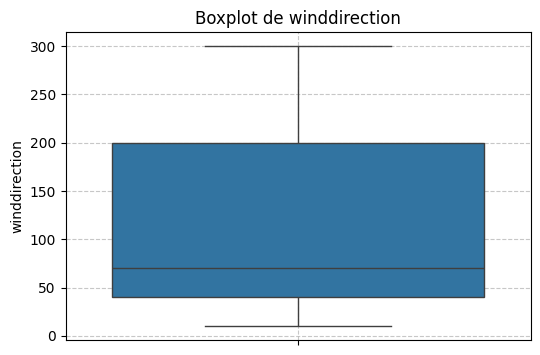

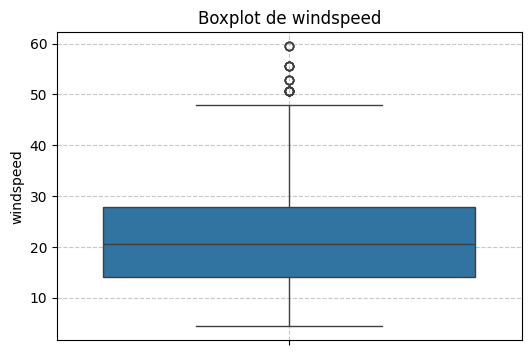

In [12]:
colunas = train_data.drop(columns=['rainfall']).columns

for col in colunas:
    plot_boxplot(train_data, col)

Como os dados estao em escalas diferentes, iremos realizar a normalizacao

In [13]:
from sklearn.preprocessing import QuantileTransformer

In [14]:
dados_normalizados = train_data.drop(columns=['rainfall'])

scaler = QuantileTransformer(output_distribution='uniform')  
train_data_scaled = scaler.fit_transform(dados_normalizados)

train_data_scaled = pd.DataFrame(train_data_scaled, columns=dados_normalizados.columns)
train_data_scaled['rainfall'] = train_data['rainfall']

train_data = train_data_scaled

In [15]:
dados_normalizados_test = test_data.drop(columns=['id'])

test_data_scaled = scaler.transform(dados_normalizados_test)  

test_data_scaled = pd.DataFrame(test_data_scaled, columns=dados_normalizados_test.columns)
test_data_scaled['id'] = test_data['id']

test_data = test_data_scaled


In [16]:
train_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,0.500003,0.499990,0.500014,0.500000,0.499998,0.500087,0.500191,0.488215,0.499793,0.499990,0.753425
std,0.288874,0.288848,0.288870,0.288817,0.288853,0.288545,0.288296,0.306439,0.288200,0.288859,0.431116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250250,0.245245,0.246747,0.248749,0.250751,0.244244,0.249249,0.250250,0.216216,0.248999,1.000000
50%,0.494995,0.504505,0.506507,0.500501,0.497748,0.520521,0.512513,0.501502,0.491992,0.498999,1.000000
75%,0.752377,0.755756,0.754755,0.739239,0.760761,0.754755,0.771772,0.748248,0.756256,0.749249,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
test_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,id
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.495789,0.500350,0.501248,0.498788,0.502029,0.521427,0.519338,0.479035,0.491571,0.520987,2554.500000
std,0.282806,0.288089,0.289288,0.292896,0.287074,0.291260,0.296280,0.309931,0.295402,0.285761,210.877136
min,0.003003,0.000000,0.000000,0.000067,0.000228,0.000000,0.000000,0.000000,0.000000,0.001502,2190.000000
25%,0.260135,0.266266,0.263075,0.253253,0.250751,0.256256,0.249249,0.232232,0.216216,0.269770,2372.250000
50%,0.481982,0.504505,0.520020,0.502503,0.512012,0.520521,0.512513,0.470470,0.491992,0.520521,2554.500000
75%,0.735736,0.728729,0.752127,0.739239,0.760761,0.787788,0.771772,0.739615,0.756256,0.763764,2736.750000
max,0.998686,0.999160,1.000000,0.997479,1.000000,1.000000,1.000000,0.996496,1.000000,1.000000,2919.000000


Podemos ver que cloud, dewpoint e humidity possuem muitos outliers, o que pode estar relacionado com rainfall

Para termos certeza, iremos plotar uma matriz de correlacao

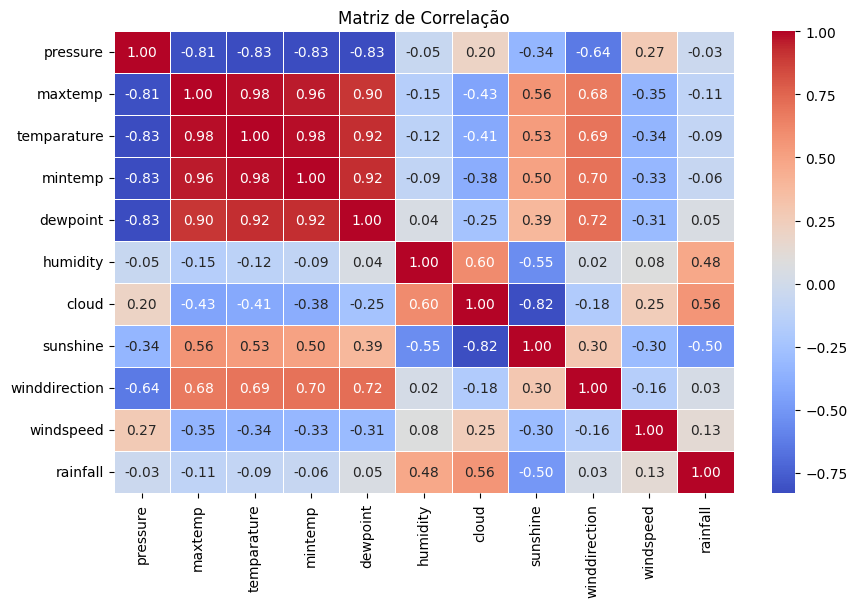

In [18]:
plot_correlation_heatmap(train_data)

Como podemos ver, cloud e humidity possuem MUITA relacao com o target, sendo esse um valioso insight

Separando os dados para os modelos

In [19]:
X = train_data.drop(columns=['rainfall']).values
X_test = test_data.drop(columns=['id']).values
y = train_data['rainfall'].values

#### Testagem

In [20]:
from sklearn.datasets import make_classification
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
resultados_modelos = {}

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  
    'max_depth': [None, 10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}



grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
)
grid_search.fit(X, y)

print(f"Melhor n_estimators: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

resultados_modelos["RandomForest"] = grid_search.best_score_

Melhor n_estimators: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Melhor Acurácia: 86.85%


XGBoost

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 10, 20, 30, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='mlogloss'),
    param_grid,
    cv=10,
    scoring="accuracy",
    n_jobs=-1,
)

grid_search.fit(X, y)

print(f"Melhor parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

resultados_modelos["XGBoost"] = grid_search.best_score_


Melhor parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Melhor Acurácia: 86.67%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear'],      
    'max_iter': [100, 200, 300]   
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42),  
    param_grid,                           
    cv=10,                              
    scoring="accuracy",                  
    n_jobs=-1                             
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

resultados_modelos["Regressão Logística"] = grid_search.best_score_

Melhores parâmetros: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor Acurácia: 86.48%


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
    'activation': ['relu', 'tanh', 'logistic'],       
    'learning_rate_init': [0.001, 0.01, 0.1],         
    'max_iter': [100, 200, 300],                      
    'solver': ['adam', 'sgd'],                      
}

grid_search = GridSearchCV(
    MLPClassifier(random_state=42, early_stopping=True),  
    param_grid,                                        
    cv=5,                                              
    scoring="accuracy",                                 
    n_jobs=-1                                           
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

resultados_modelos["MLPClassifier"] = grid_search.best_score_

Melhores parâmetros: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 100, 'solver': 'adam'}
Melhor Acurácia: 86.62%


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.1, 1],   
    'degree': [2, 3, 4],                  
}

# Criando o GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42),                  
    param_grid,                           
    cv=5,                                
    scoring="accuracy",                    
    n_jobs=-1                             
)

grid_search.fit(X, y)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor Acurácia: {grid_search.best_score_ * 100:.2f}%")

resultados_modelos["SVM"] = grid_search.best_score_

Melhores parâmetros: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Melhor Acurácia: 86.62%


Plotando os resultados

In [ ]:
from sklearn.ensemble import StackingClassifier

modelo1 = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
modelo2 = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8)
modelo3 = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='liblinear')
modelo4 = MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), learning_rate_init=0.1, max_iter=100, solver='adam')
modelo5 = SVC(C=0.1, degree=2, gamma='scale', kernel='poly')

meta_modelo = LogisticRegression()

ensemble_stack = StackingClassifier(
    estimators=[
        ('rf', modelo1),  
        ('xgb', modelo2),  
        ('lr', modelo3),   
        ('mlp', modelo4),  
        ('svc', modelo5),  
    ],
    final_estimator=meta_modelo
)



In [40]:
ensemble_stack.fit(X,y)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       n_estimators=200)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              featu...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lr',
                                LogisticRegression(C=1, penalty='l1',
                                                   solver='liblinear')),
                               ('mlp',
                                MLPClassifier(activation='tanh',
                                              learning_rate_init=0.1,
                                              max_iter=100)),
                               ('svc', SVC(C=0.1, degree=2, kernel='poly'))],
                   final_estimator=LogisticRegression())

In [48]:
y_stack = ensemble_stack.predict_proba(X_test)

In [51]:
resultado_stack = pd.DataFrame()
resultado_stack['id'] = test_data['id']
resultado_stack['rainfall'] = y_stack[:, 1]

In [53]:
resultado_stack.to_csv('stack.csv', index=False)

Ensemble com a media

In [ ]:
import numpy as np

modelo1.fit(X, y)
modelo2.fit(X, y)
modelo3.fit(X, y)
modelo4.fit(X, y)

prob_modelo1 = modelo1.predict_proba(X_test)[:, 1]
prob_modelo2 = modelo2.predict_proba(X_test)[:, 1]
prob_modelo3 = modelo3.predict_proba(X_test)[:, 1]
prob_modelo4 = modelo4.predict_proba(X_test)[:, 1]

media_probabilidades = np.mean([prob_modelo1, prob_modelo2, prob_modelo3, prob_modelo4], axis=0)


In [60]:
resultado_stack = pd.DataFrame()
resultado_stack['id'] = test_data['id']
resultado_stack['rainfall'] = media_probabilidades
resultado_stack.to_csv('avg.csv', index=False)